# GRADIENT DESCENT
## Importance of Gradient Descent in Machine Learning

Plain vanilla gradient descent in one dimension.

First:
 - Choose a starting point 
 - Find the gradient at the starting point
 - If it is close to zero then stop
 - Otherwise iterate

Iterate as follows:
 - Take a small step in the downhill direction (opposite to the gradient)
 - Find the gradient
 - If it is close to zero then stop


## Initializing the Six-Himp Camel Function

In [1]:
import numpy as np
import math as mt
import Gradient_descent_exercise


In [2]:
def fn_loss(x, y):
    return  2*x**2 - 1.05*(x**4) + (x**6)/6 + (x*y) + (y**2)
    
def fn_grad1(x,y):
    return 4*x - 4.2*(x**3) + x**5 + y

def fn_grad2(x,y):
    return x + 2*y

In [3]:
solver = Gradient_descent_exercise.gradient_descent(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)

### Deterning bound for the steps

The Three-Hump Camel function is usually evaluated on the square xi ∈ [-5, 5], for all i = 1, 2. 

Given an initial starting point of (x_init, y_init) = (5 ,5), then:
    The step size(eta) should be such that:
        x_init - eta * gradient_x is within the region [-5, 5] and
        y_init - eta * gradient_y is within the region [-5, 5]

In [4]:
#Gradient with respect to x is
fn_grad1(5,5)

2625.0

In [5]:
#Gradient with respect to x is
fn_grad2(5,5)

15

In [6]:
#Step size therefore is:
step_size1 = (-5-5)/(-fn_grad1(5,5))
step_size2 = (-5-5)/(-fn_grad2(5,5))

print(np.minimum(step_size1,step_size2))

0.0038095238095238095


The step size thefore should be less than 0.0038 for gradient descent to yield the desired results 

### Minimum of the function with a step size of 0.001

In [7]:
solver.find_min(x_init = 5, y_init = 5, max_iter = 1000000, eta = 0.001, tol = 1e-10)


15421

In [8]:
print('The minimum of the loss function is {}'.format((solver.loss_fn_min)))
print('The value of x which generates the minimum is {}'.format((solver.x_at_min)))
print('The value of y which generates the minimum is {}'.format((solver.y_at_min)))

The minimum of the loss function is 3.6771201792461436e-21
The value of x which generates the minimum is -2.60658781148321e-11
The value of y which generates the minimum is 6.29139742905174e-11


### Path of the loss function for a step size of 0.001

Text(0, 0.5, 'Loss')

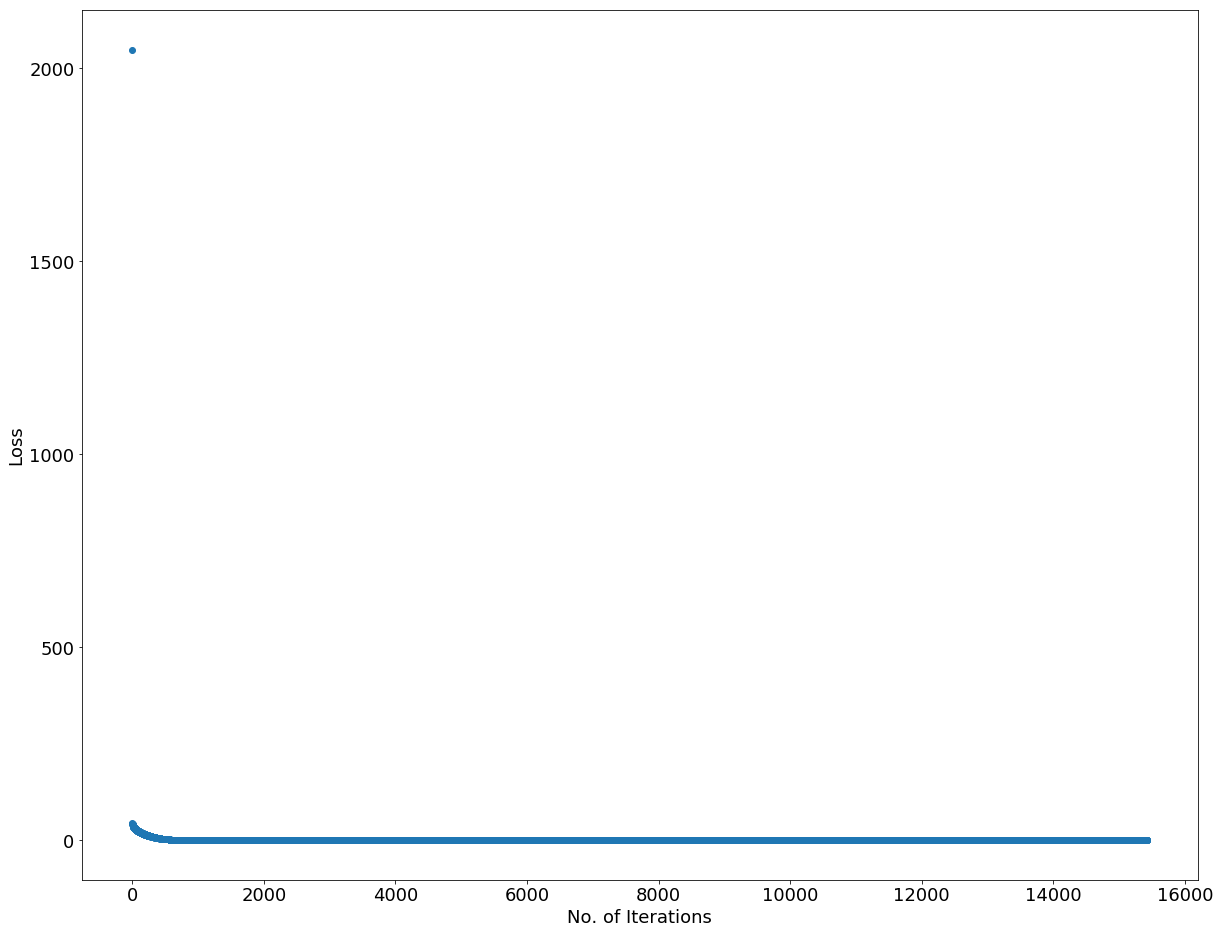

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(solver.n_iter, solver.loss_path)
ax1.set_xlabel('No. of Iterations')
ax1.set_ylabel('Loss')

#from scipy.interpolate import make_interp_spline, BSpline
#spl = make_interp_spline(eta_x, iterations_y, k=3) 
#eta_x = np.array(eta)
#iterations_y = np.array(iterations)
#x_smooth= np.linspace(eta_x.min(), eta_x.max(), 100)
#y_smooth= spl(x_smooth)
#ax1.plot(x_smooth, y_smooth)


### Doubling the step size

In [10]:
solver.find_min(x_init = 5, y_init = 5, max_iter = 100000, eta = 0.002, tol = 1e-10)
print(solver.num_iters)

6511


In [11]:
print('The minimum of the loss function is {}'.format((solver.loss_fn_min)))
print('The value of x which generates the minimum is {}'.format((solver.x_at_min)))
print('The value of y which generates the minimum is {}'.format((solver.y_at_min)))

The minimum of the loss function is 0.29863844223685965
The value of x which generates the minimum is -1.7475523458353897
The value of y which generates the minimum is 0.8737761729674274


When the step size is doubled from 0.001 to 0.002, the number of iterations needed to arrive at the global minimum of the function decrease from 1,601 to 797

This implies that the number of iterations needed to arrive at the global minimum have been greatly reduced

### Halfing the step size

In [12]:
solver.find_min(x_init = 5, y_init = 5, max_iter = 100000, eta = 0.0005, tol = 1e-10)
print(solver.num_iters)

30798


In [13]:
print('The minimum of the loss function is {}'.format((solver.loss_fn_min)))
print('The value of x which generates the minimum is {}'.format((solver.x_at_min)))
print('The value of y which generates the minimum is {}'.format((solver.y_at_min)))

The minimum of the loss function is 3.681635104152193e-21
The value of x which generates the minimum is -2.607928837202951e-11
The value of y which generates the minimum is 6.295365885791942e-11


### Graphical representation of effect of chnaging the step size

In [20]:
eta = np.linspace(0.001, 0.0038,num=500, endpoint=True)
iterations = []
for z in eta:
    iters = solver.find_min(x_init = 5, y_init = 5, max_iter = 100000, eta = z, tol = 1e-10)
    iterations.append(iters)
    

eta = np.linspace(0.0005,0.002,num=500, endpoint=True)
for z in eta:
    solver.find_min(x_init = 3, y_init=2, max_iter = 100000, eta = z, tol = 1e-10)

In [21]:
print(len(iterations))
print(len(eta))

500
500


Text(0, 0.5, 'No. of Iterations')

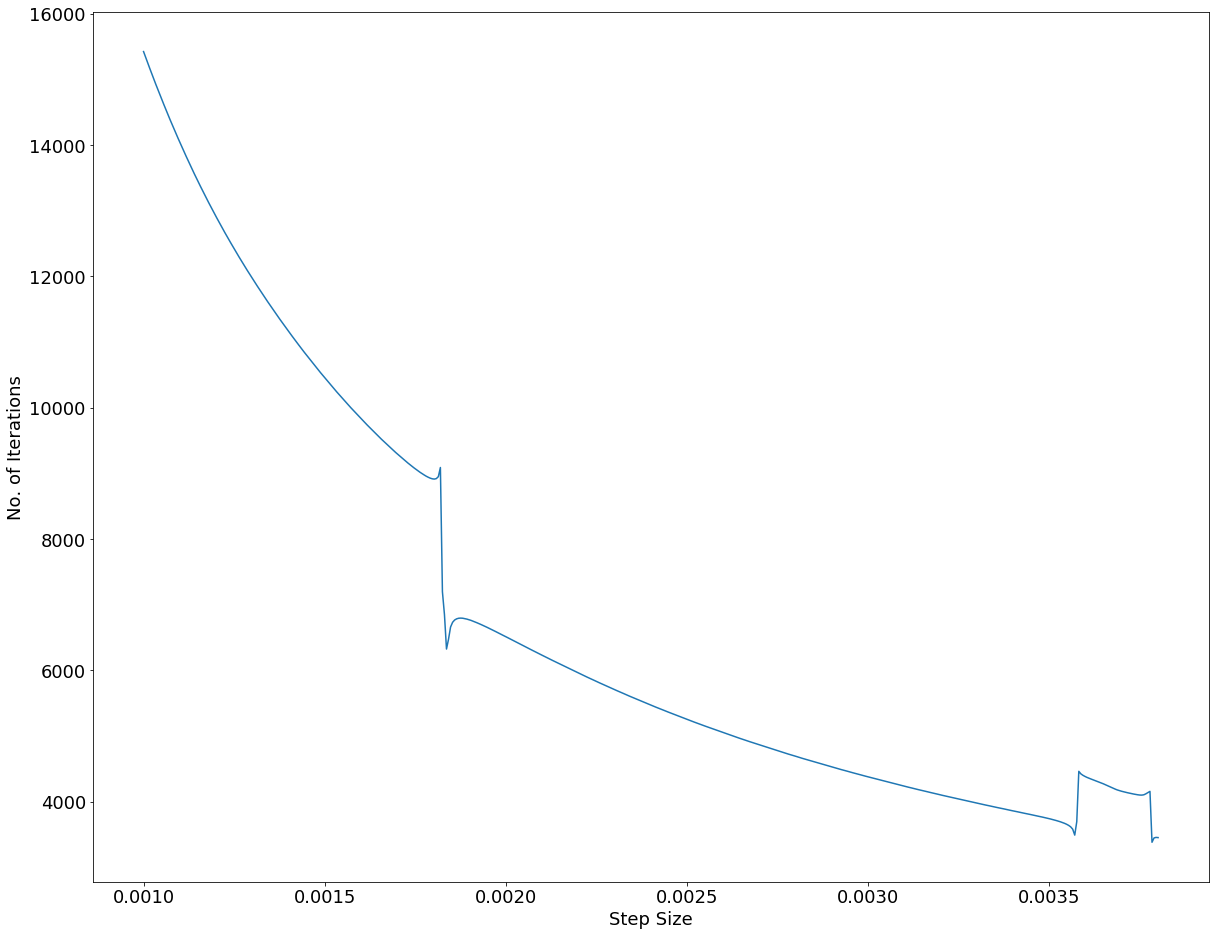

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eta, iterations)
ax1.set_xlabel('Step Size')
ax1.set_ylabel('No. of Iterations')



In [23]:
solver.find_min(x_init = 5, y_init = 5, max_iter = 100000, eta = 0.0038, tol = 1e-10)
print(solver.num_iters)

3453


In [24]:
solver.find_min(x_init = 5, y_init = 5, max_iter = 100000, eta = 0.003, tol = 1e-10)
print(solver.num_iters)

4377


In [25]:
fn_grad2(1.7475518357853348,-0.8737709448232991)

9.946138736616206e-06